In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [2]:
# Define tickers and fetch data
tickers = ['AAPL', 'GOOGL', 'IBM','AMZN']  
data = []
start_date='2020-01-01'
end_date='2023-01-01'

aapl_data = yf.download('AAPL', start=start_date, end=end_date)
googl_data = yf.download('GOOGL', start=start_date, end=end_date)
IBM_data = yf.download('IBM', start=start_date, end=end_date)
amzn_data = yf.download('AMZN', start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

In [7]:
import numpy as np
import pandas as pd
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from data_preprocessing import analyze_data_quality,detect_outliers,plot_outliers,handle_outliers

{'missing_values': Price      Ticker
Adj Close  AAPL      0
Close      AAPL      0
High       AAPL      0
Low        AAPL      0
Open       AAPL      0
Volume     AAPL      0
dtype: int64, 'missing_percentage': Price      Ticker
Adj Close  AAPL      0.0
Close      AAPL      0.0
High       AAPL      0.0
Low        AAPL      0.0
Open       AAPL      0.0
Volume     AAPL      0.0
dtype: float64, 'descriptive_stats': Price    Adj Close       Close        High         Low        Open  \
Ticker        AAPL        AAPL        AAPL        AAPL        AAPL   
count   756.000000  756.000000  756.000000  756.000000  756.000000   
mean    127.940988  130.311812  131.892775  128.614983  130.231998   
std      30.494847   30.566496   30.841435   30.287325   30.596429   
min      54.509754   56.092499   57.125000   53.152500   57.020000   
25%     112.981398  115.739374  117.275000  114.129997  115.924374   
50%     133.331627  135.379997  137.200005  133.750000  135.794998   
75%     148.579079  150.

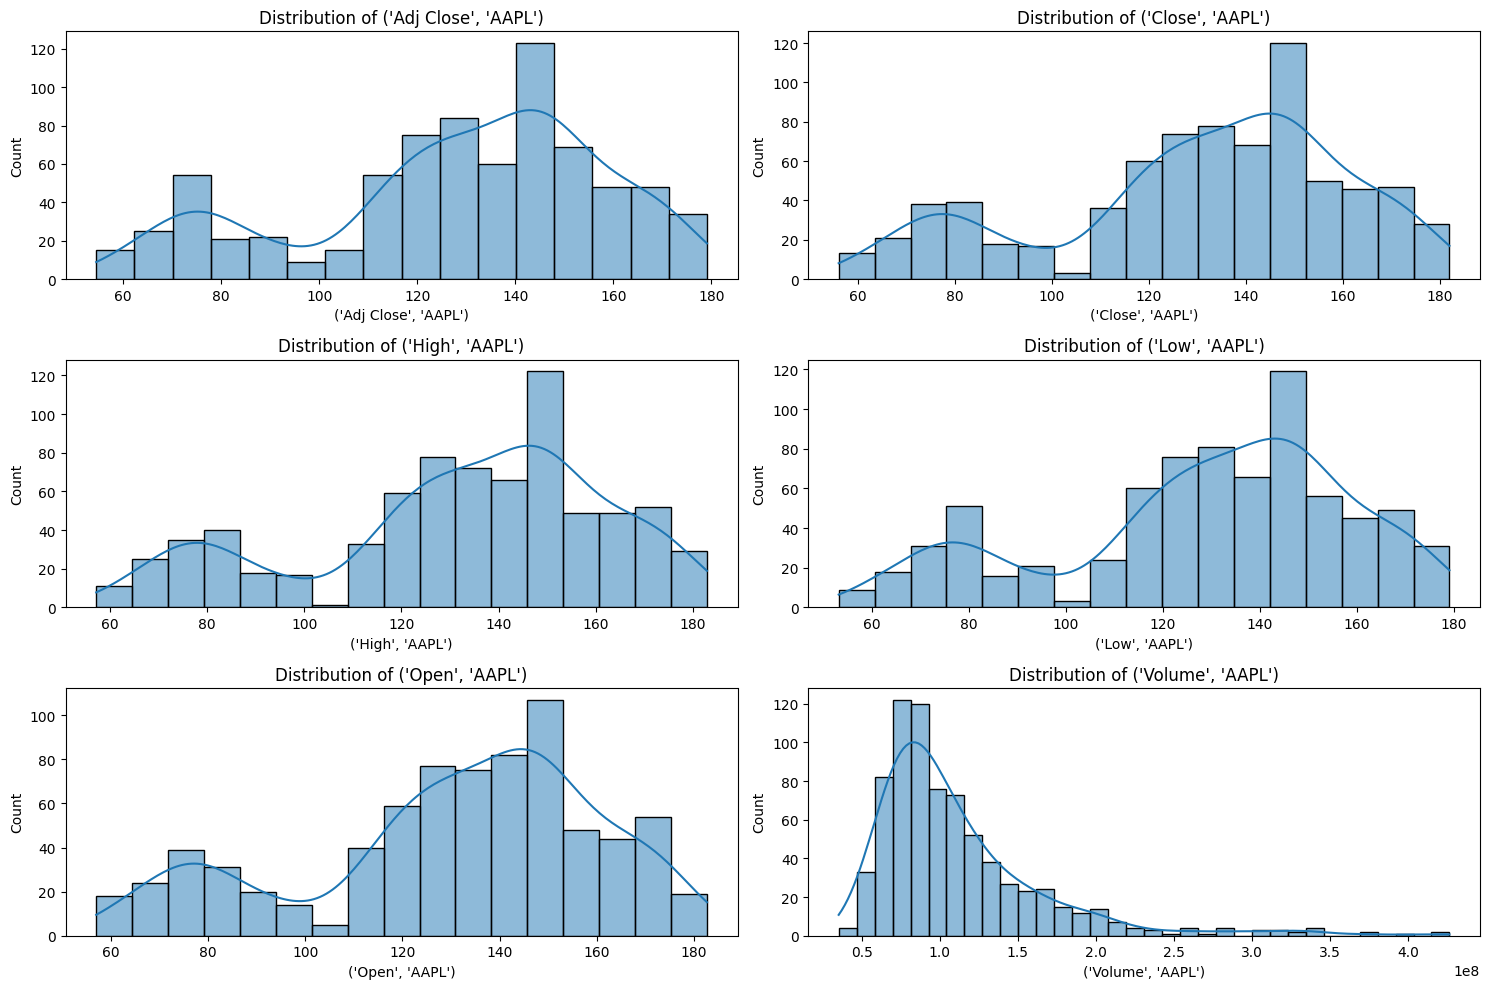

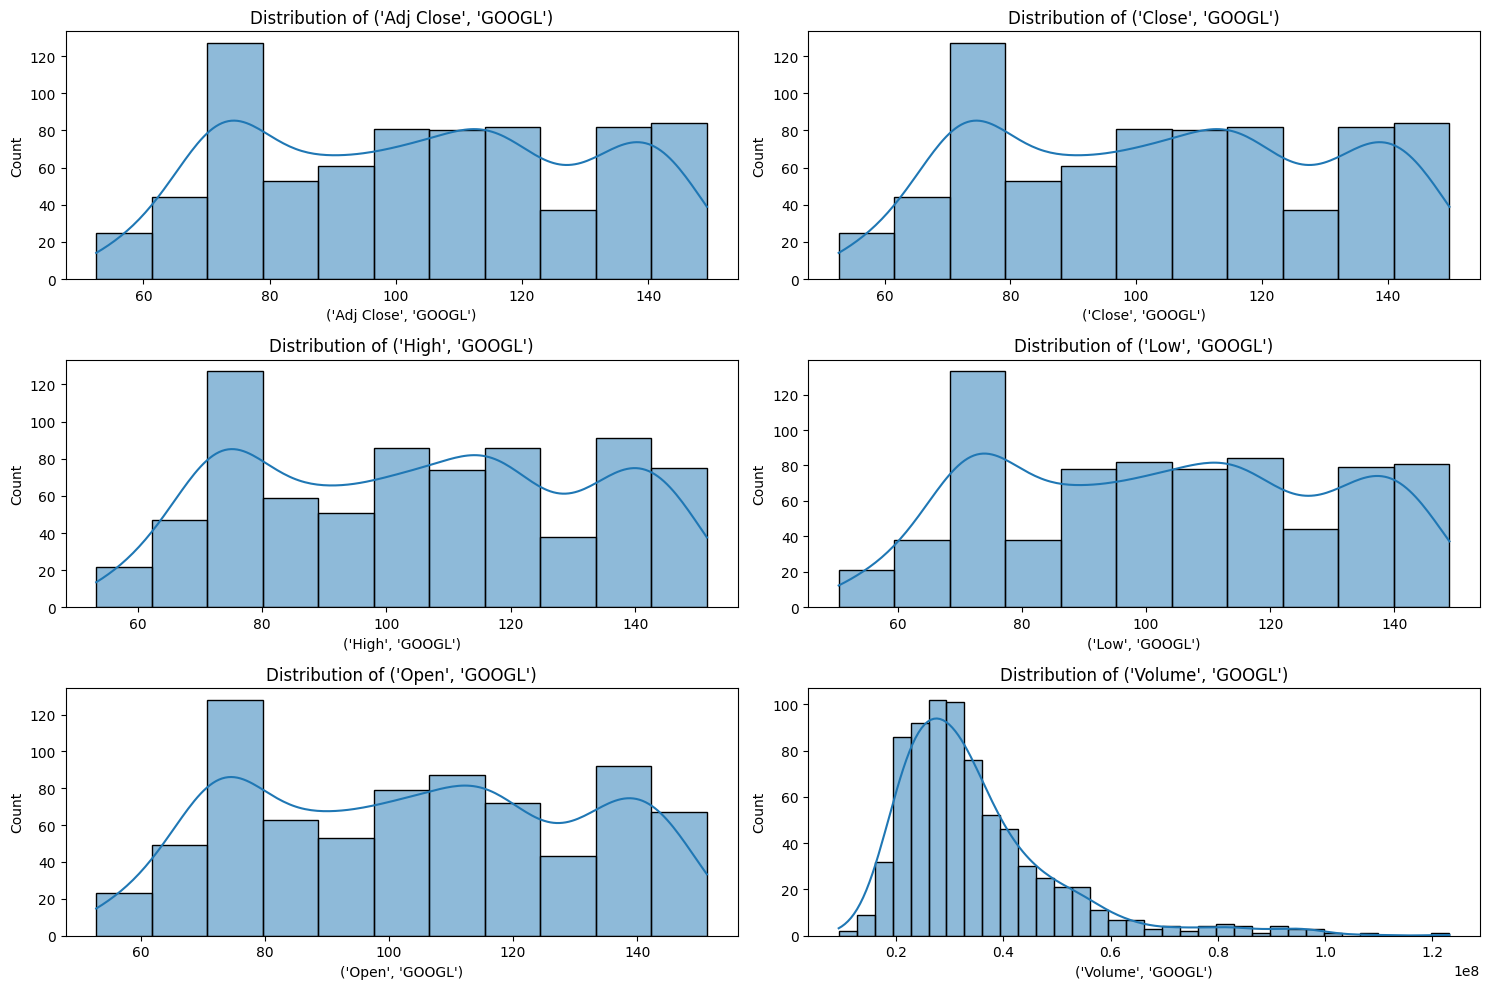

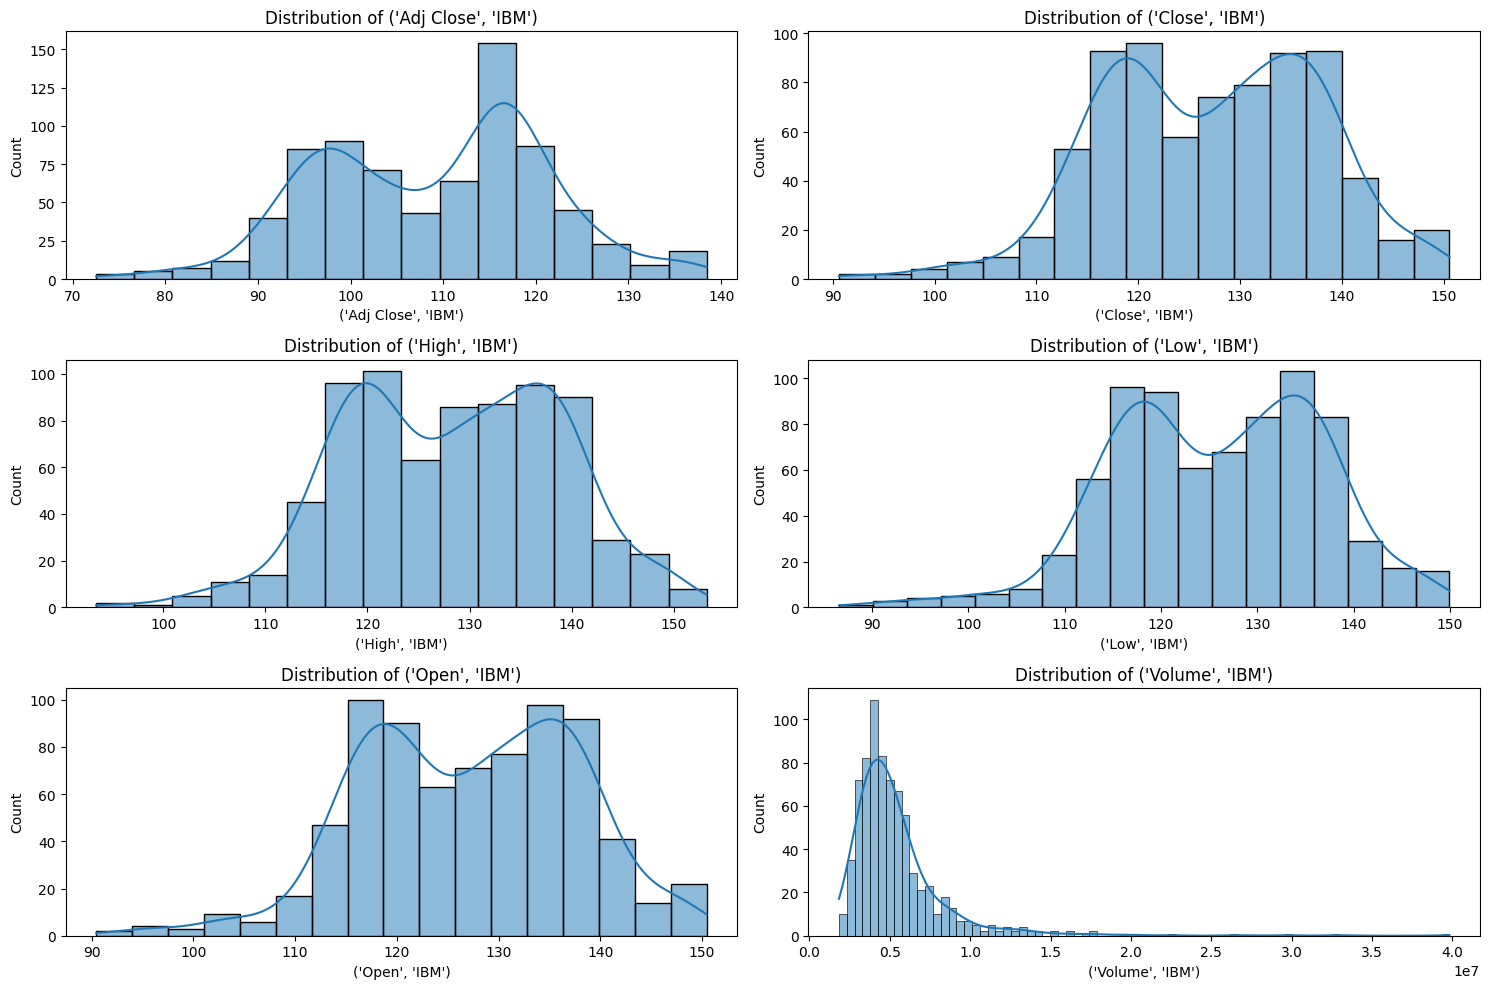

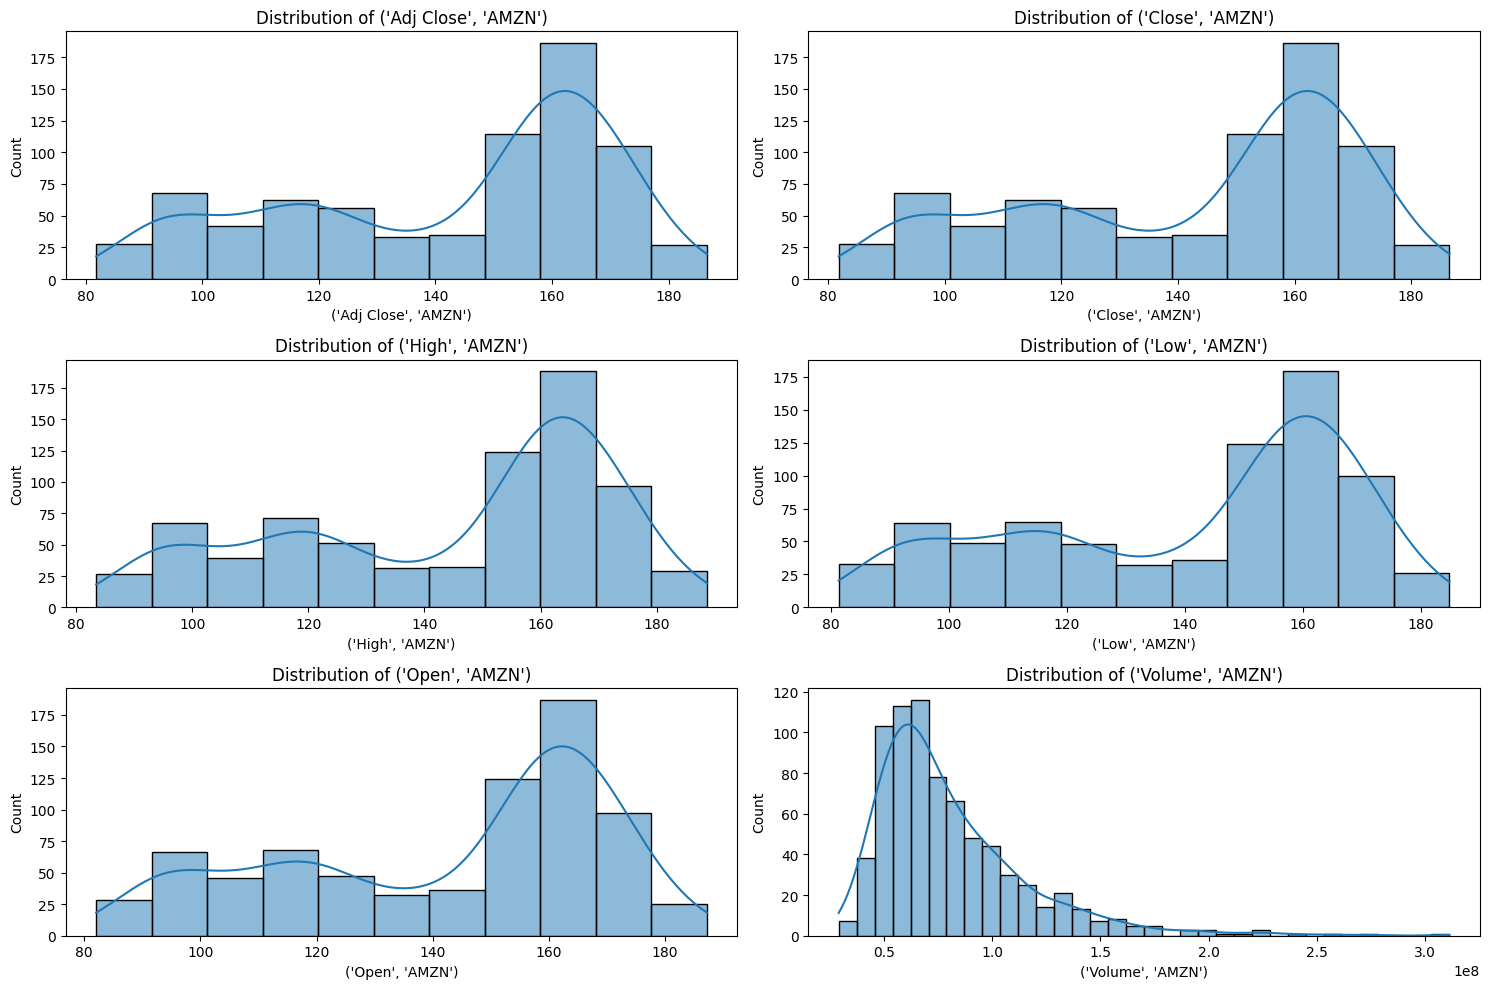

In [8]:
print(analyze_data_quality(aapl_data))
print(analyze_data_quality(googl_data))
print(analyze_data_quality(IBM_data))
print(analyze_data_quality(amzn_data))

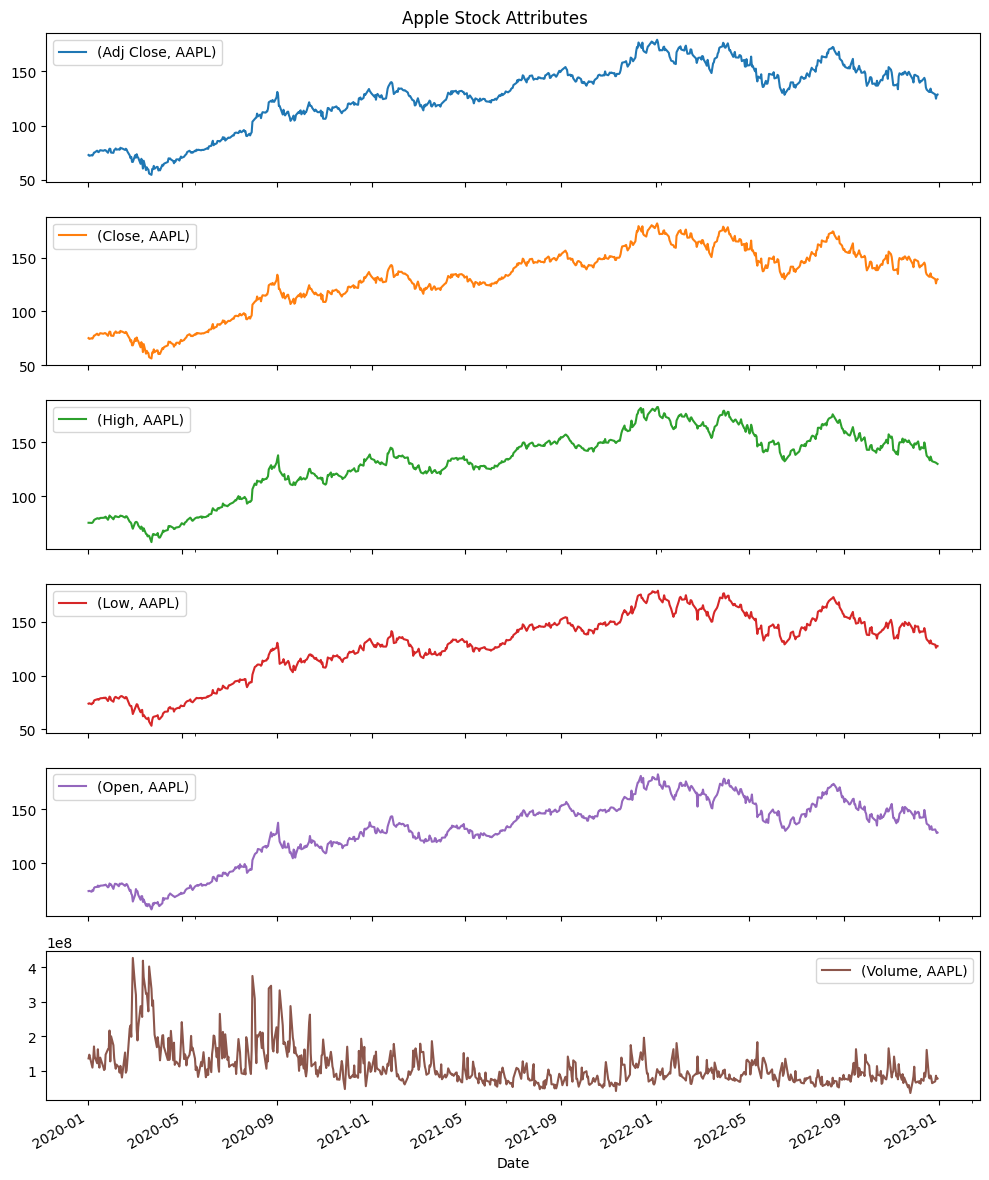

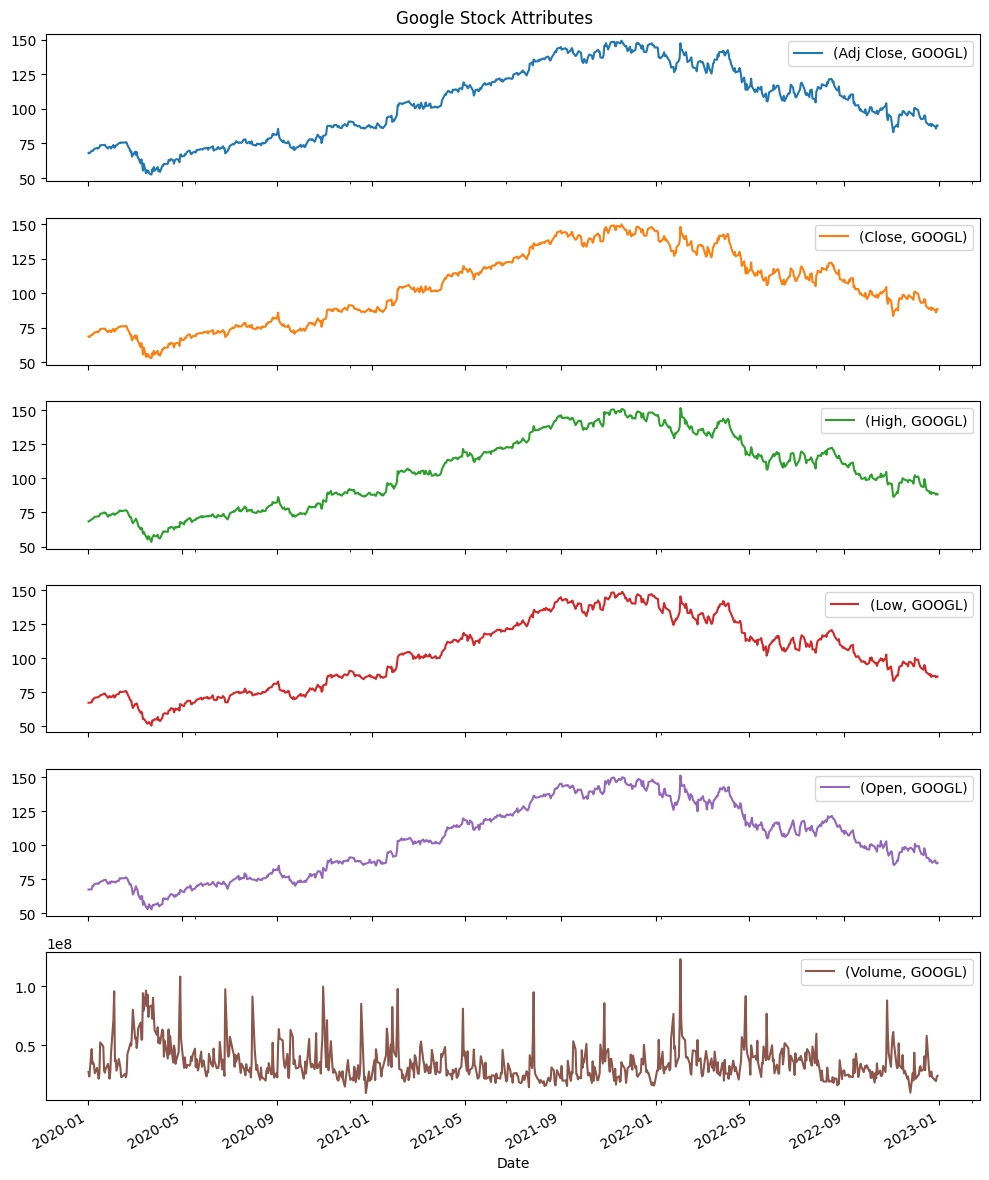

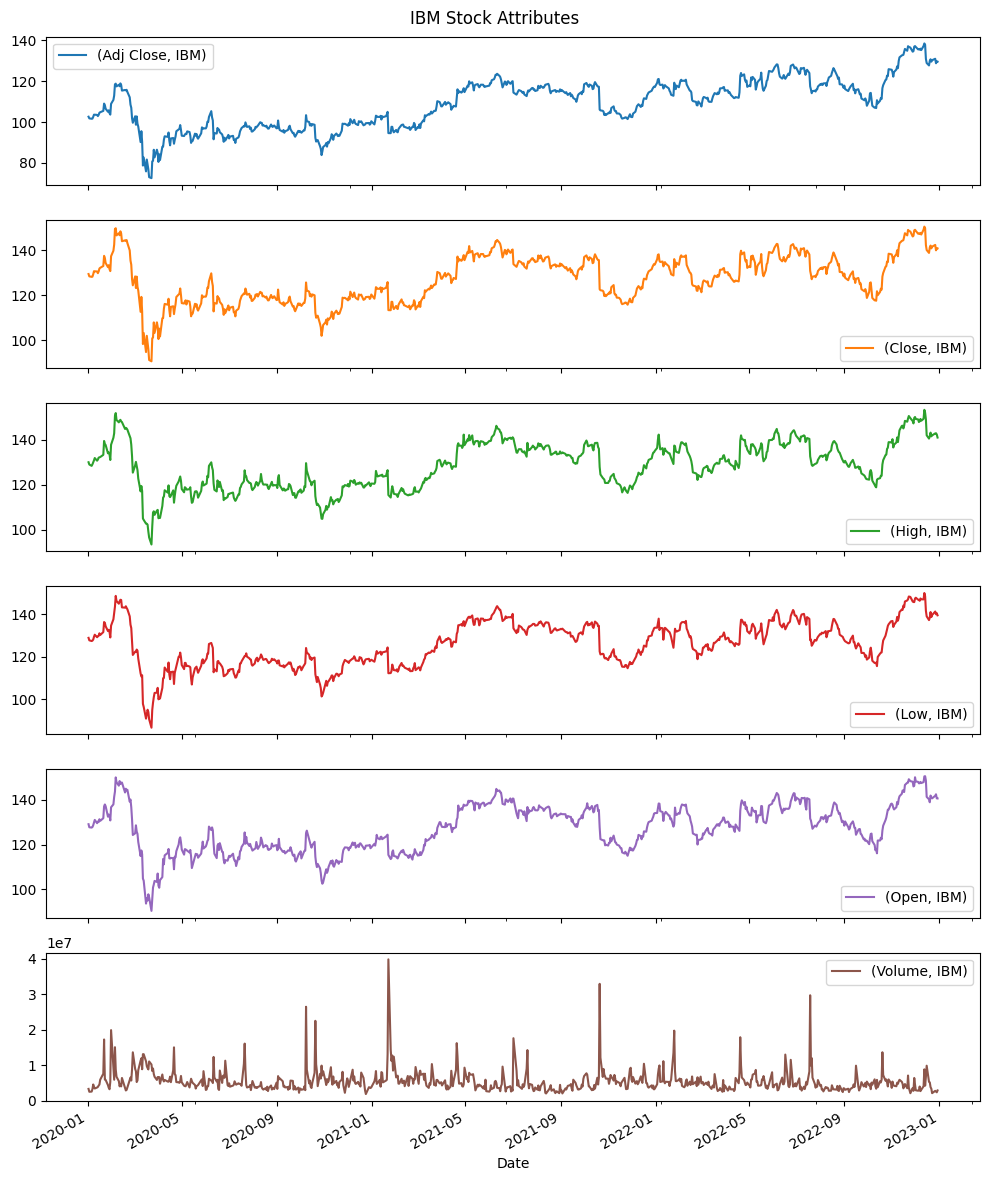

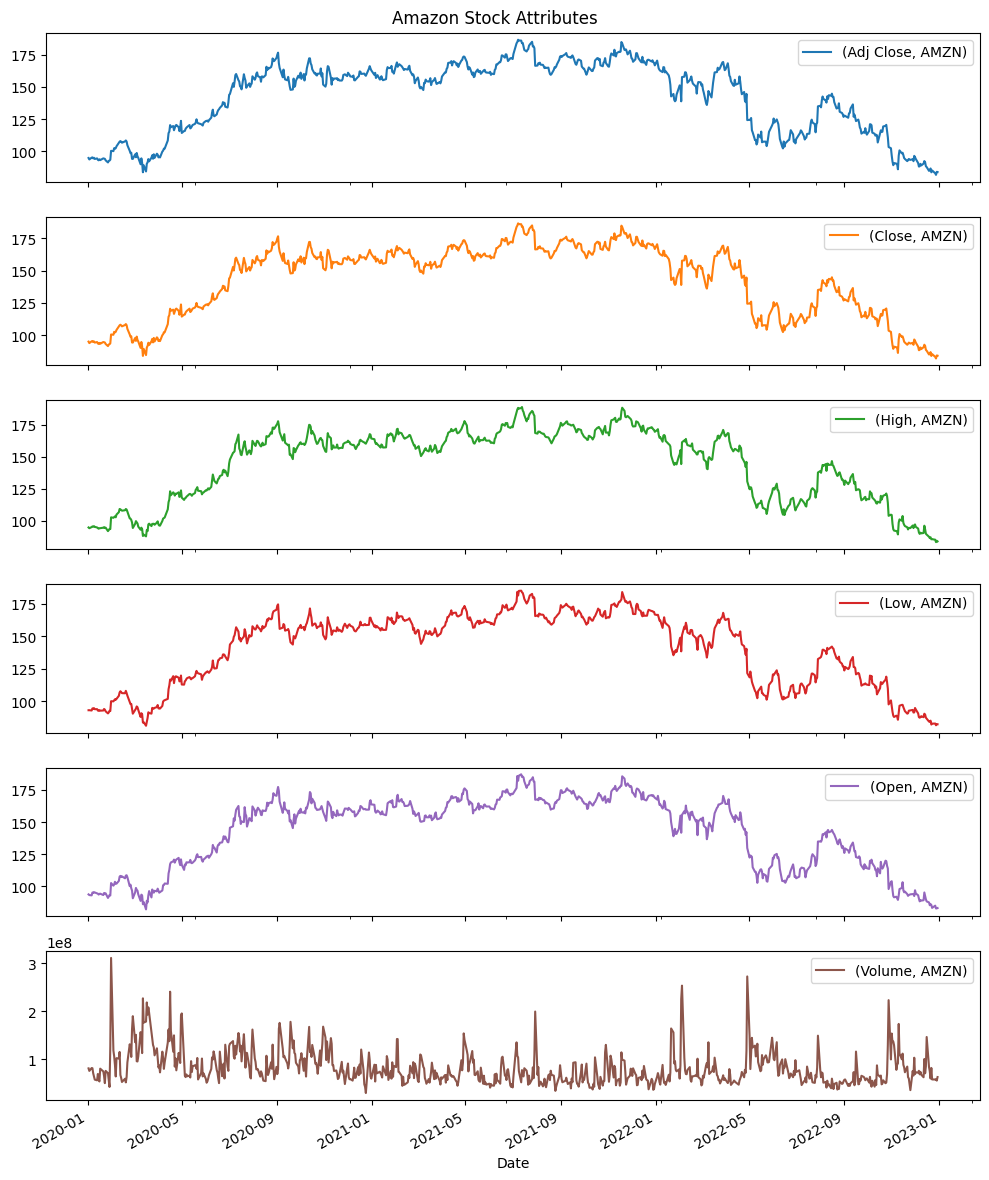

In [9]:
import matplotlib.pyplot as plt

# Plot AAPL data
aapl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Apple Stock Attributes")  # Add a title for the entire figure
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# Plot GOOGL data
googl_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Google Stock Attributes")
plt.tight_layout()
plt.show()

# Plot IBM data
IBM_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("IBM Stock Attributes")
plt.tight_layout()
plt.show()

# Plot AMZN data
amzn_data.plot(subplots=True, figsize=(10, 12))
plt.suptitle("Amazon Stock Attributes")
plt.tight_layout()
plt.show()

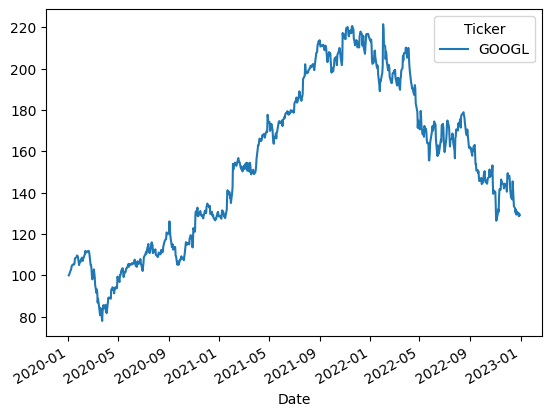

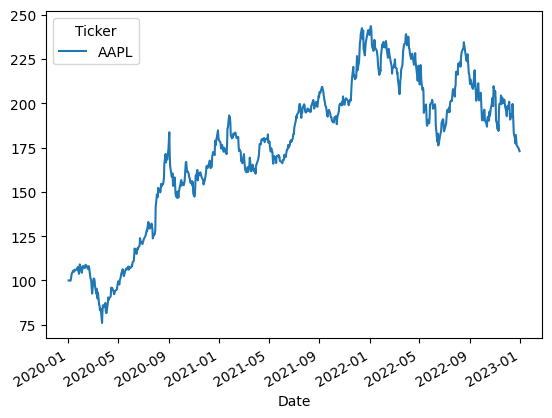

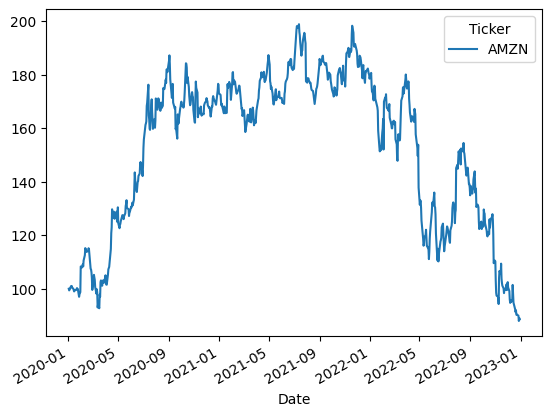

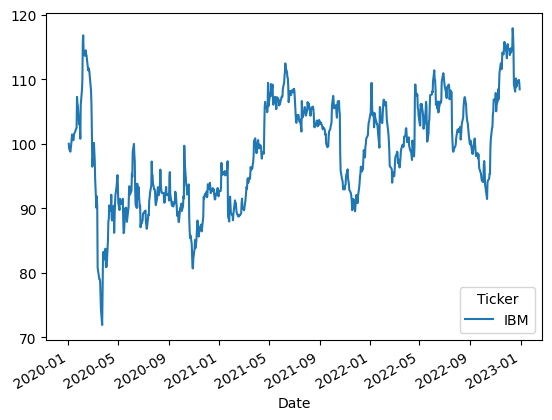

In [10]:
# Normalizing and comparison
# Both stocks start from 100
normalized_google = googl_data.High.div(googl_data.High.iloc[0]).mul(100)
normalized_apple = aapl_data.High.div(aapl_data.High.iloc[0]).mul(100)
normalized_amazon = amzn_data.High.div(amzn_data.High.iloc[0]).mul(100)
normalized_ibm = IBM_data.High.div(IBM_data.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_apple.plot()
normalized_amazon.plot()
normalized_ibm.plot()
plt.show()


Analyzing outliers for Google:

Outlier Statistics:

('Adj Close', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.06
Upper bound: 199.40

('Close', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.08
Upper bound: 200.13

('High', 'GOOGL'):
Number of outliers: 0
Lower bound: 4.70
Upper bound: 203.35

('Low', 'GOOGL'):
Number of outliers: 0
Lower bound: 3.52
Upper bound: 199.58

('Open', 'GOOGL'):
Number of outliers: 0
Lower bound: 5.01
Upper bound: 200.31

('Volume', 'GOOGL'):
Number of outliers: 42
Lower bound: 2111750.00
Upper bound: 63209750.00

Generating box plots...


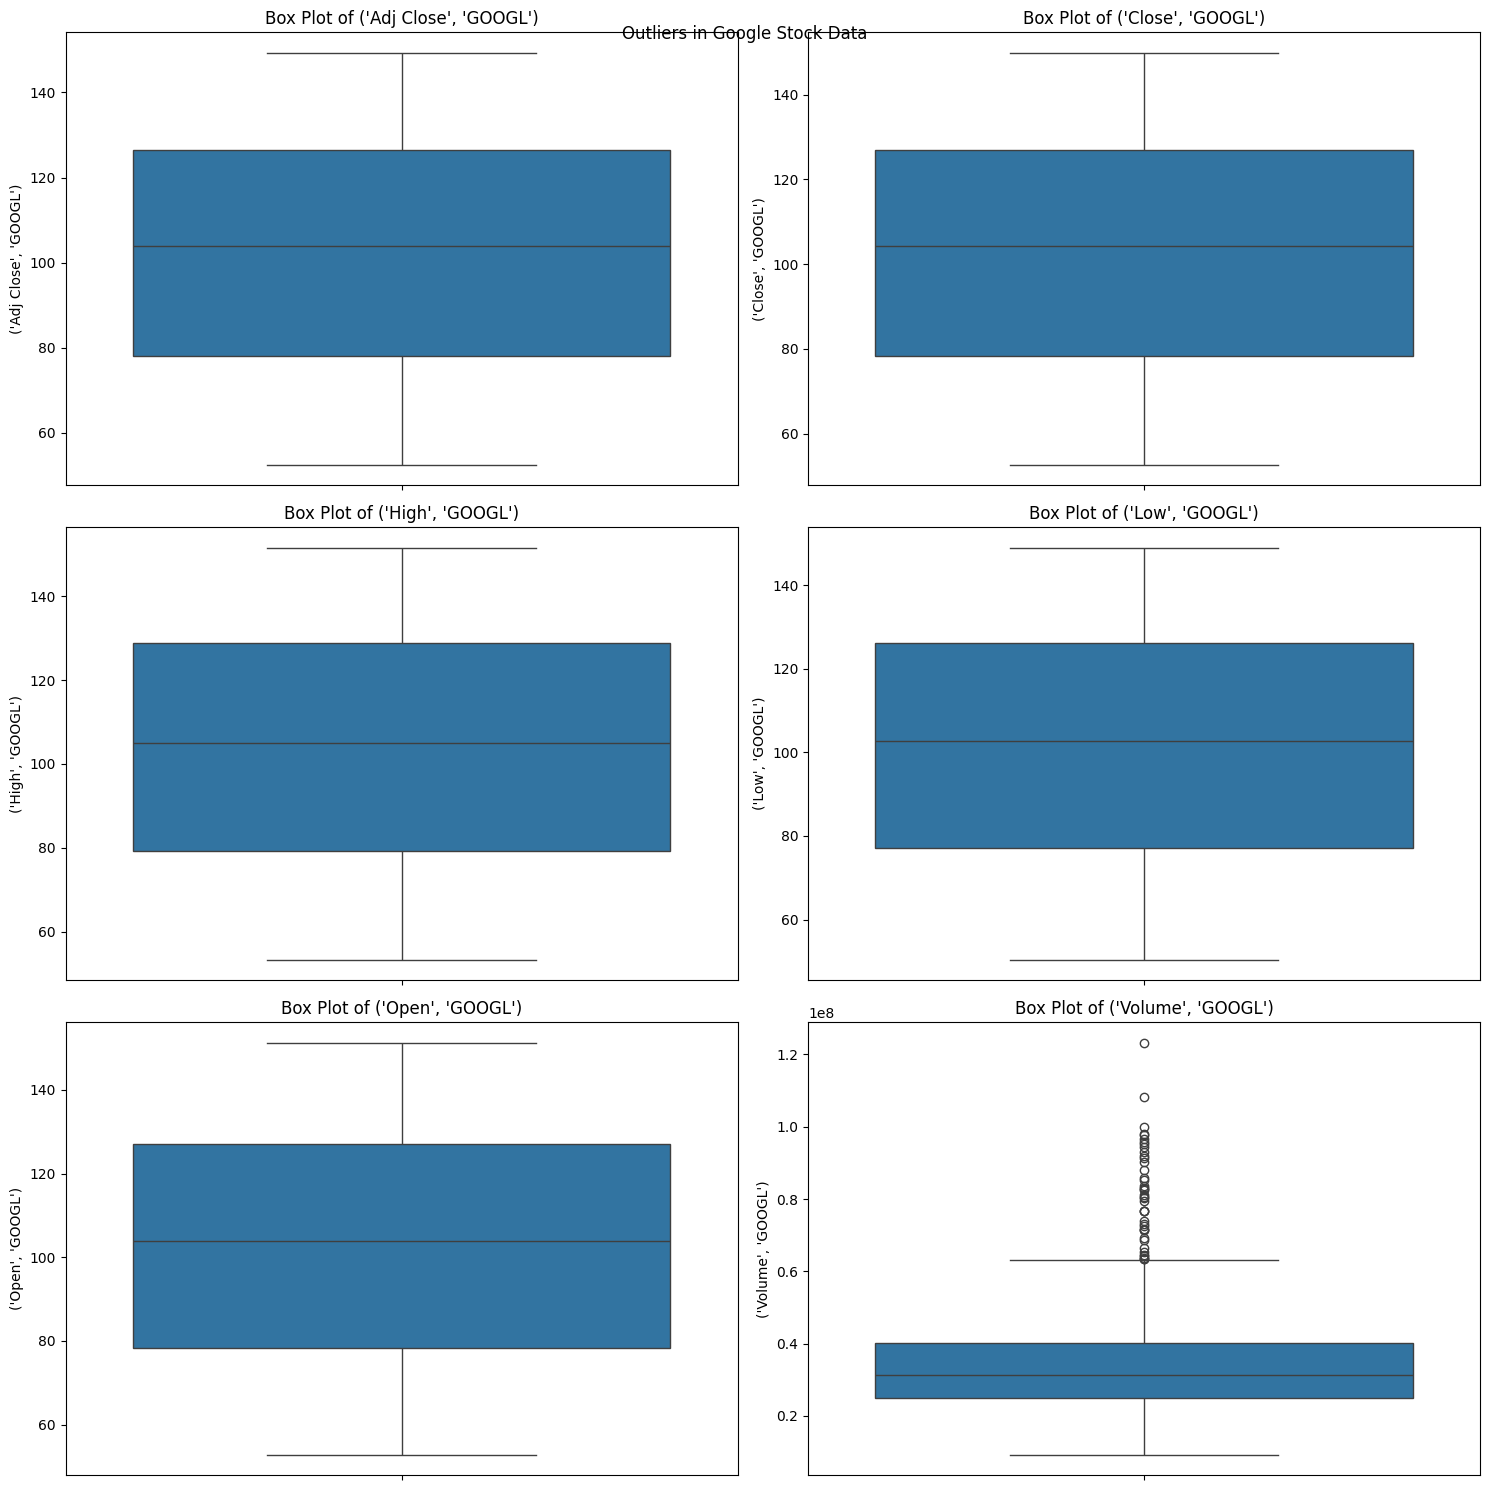


Handling outliers...

Outlier Count Comparison (Before -> After):
('Adj Close', 'GOOGL'): 0 -> 0
('Close', 'GOOGL'): 0 -> 0
('High', 'GOOGL'): 0 -> 0
('Low', 'GOOGL'): 0 -> 0
('Open', 'GOOGL'): 0 -> 0
('Volume', 'GOOGL'): 42 -> 0


In [11]:
print(f"\nAnalyzing outliers for Google:")
# Detect outliers using IQR method
outliers = detect_outliers(googl_data, method='iqr', threshold=1.5)
# Print outlier statistics
print("\nOutlier Statistics:")
for column, stats in outliers.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower bound: {stats['lower_bound']:.2f}")
        print(f"Upper bound: {stats['upper_bound']:.2f}")
# Visualize outliers using box plots
print("\nGenerating box plots...")
plot_outliers(googl_data)
plt.suptitle(f'Outliers in Google Stock Data')
plt.show()

# Handle outliers using clipping method
print("\nHandling outliers...")
googl_data = handle_outliers(googl_data, method='clip')
# Verify outlier handling
outliers_after = detect_outliers(googl_data, method='iqr', threshold=1.5)
    
# Compare before and after
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")


Analyzing outliers for Apple:

Outlier Statistics:

('Adj Close', 'AAPL'):
Number of outliers: 7
Lower bound: 59.58
Upper bound: 201.98

('Close', 'AAPL'):
Number of outliers: 13
Lower bound: 63.29
Upper bound: 203.15

('High', 'AAPL'):
Number of outliers: 14
Lower bound: 65.33
Upper bound: 203.84

('Low', 'AAPL'):
Number of outliers: 13
Lower bound: 61.78
Upper bound: 201.38

('Open', 'AAPL'):
Number of outliers: 18
Lower bound: 64.42
Upper bound: 201.76

('Volume', 'AAPL'):
Number of outliers: 41
Lower bound: -3537300.00
Upper bound: 209534700.00

Generating box plots...


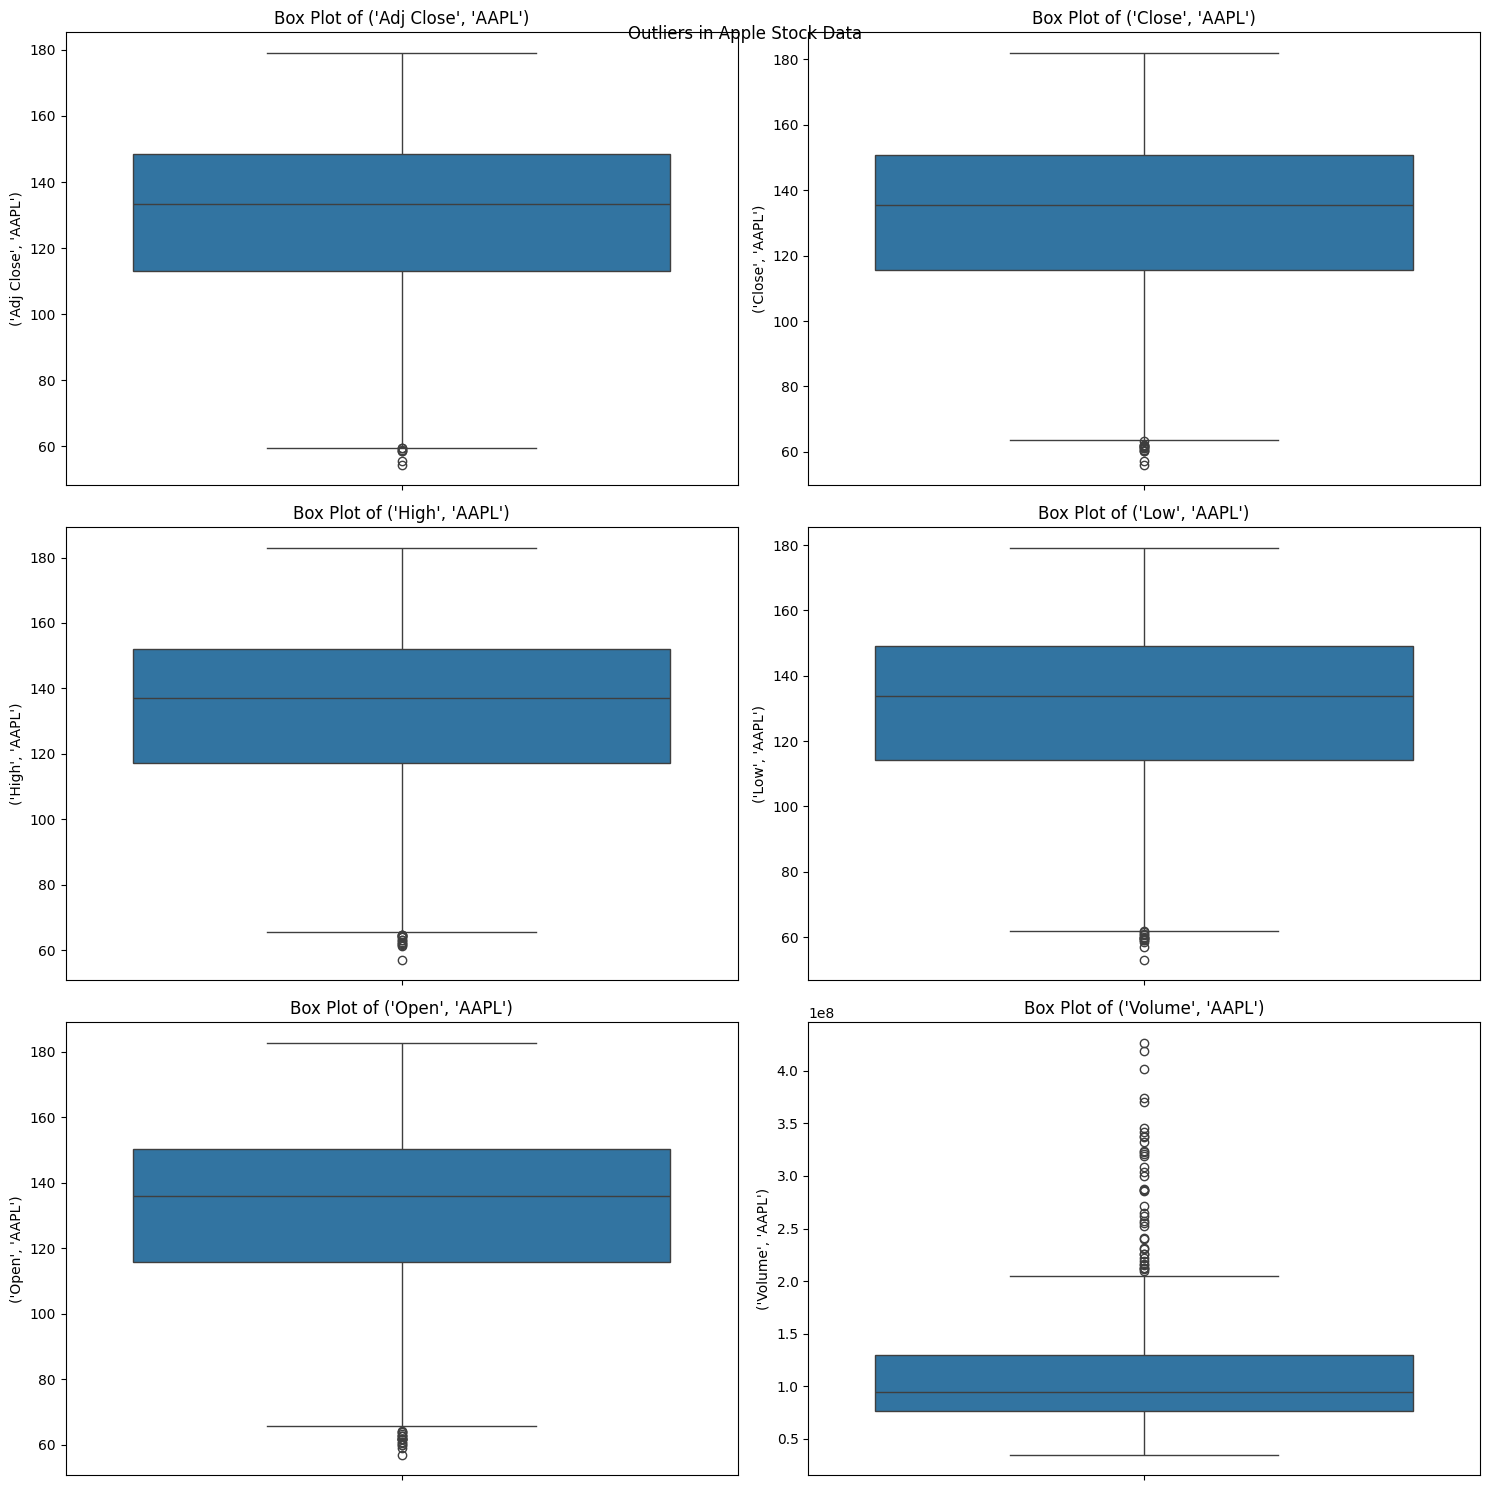


Handling outliers...

Outlier Count Comparison (Before -> After):
('Adj Close', 'AAPL'): 7 -> 0
('Close', 'AAPL'): 13 -> 0
('High', 'AAPL'): 14 -> 0
('Low', 'AAPL'): 13 -> 0
('Open', 'AAPL'): 18 -> 0
('Volume', 'AAPL'): 41 -> 0


In [12]:
print(f"\nAnalyzing outliers for Apple:")
# Detect outliers using IQR method
outliers = detect_outliers(aapl_data, method='iqr', threshold=1.5)
# Print outlier statistics
print("\nOutlier Statistics:")
for column, stats in outliers.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower bound: {stats['lower_bound']:.2f}")
        print(f"Upper bound: {stats['upper_bound']:.2f}")
# Visualize outliers using box plots
print("\nGenerating box plots...")
plot_outliers(aapl_data)
plt.suptitle(f'Outliers in Apple Stock Data')
plt.show()

# Handle outliers using clipping method
print("\nHandling outliers...")
aapl_data = handle_outliers(aapl_data, method='clip')
# Verify outlier handling
outliers_after = detect_outliers(aapl_data, method='iqr', threshold=1.5)
    
# Compare before and after
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")

Analyzin Outliers for the IBM Stock Data

('Adj Close', 'IBM')
 Number of Outliers : 0
 Lower Bound : 69.64
 Upper Bound : 146.58

('Close', 'IBM')
 Number of Outliers : 2
 Lower Bound : 93.77
 Upper Bound : 160.68

('High', 'IBM')
 Number of Outliers : 1
 Lower Bound : 94.33
 Upper Bound : 162.73

('Low', 'IBM')
 Number of Outliers : 3
 Lower Bound : 92.79
 Upper Bound : 159.64

('Open', 'IBM')
 Number of Outliers : 1
 Lower Bound : 93.49
 Upper Bound : 160.79

('Volume', 'IBM')
 Number of Outliers : 52
 Lower Bound : 376201.38
 Upper Bound : 9340508.38

 Plotting Outliers


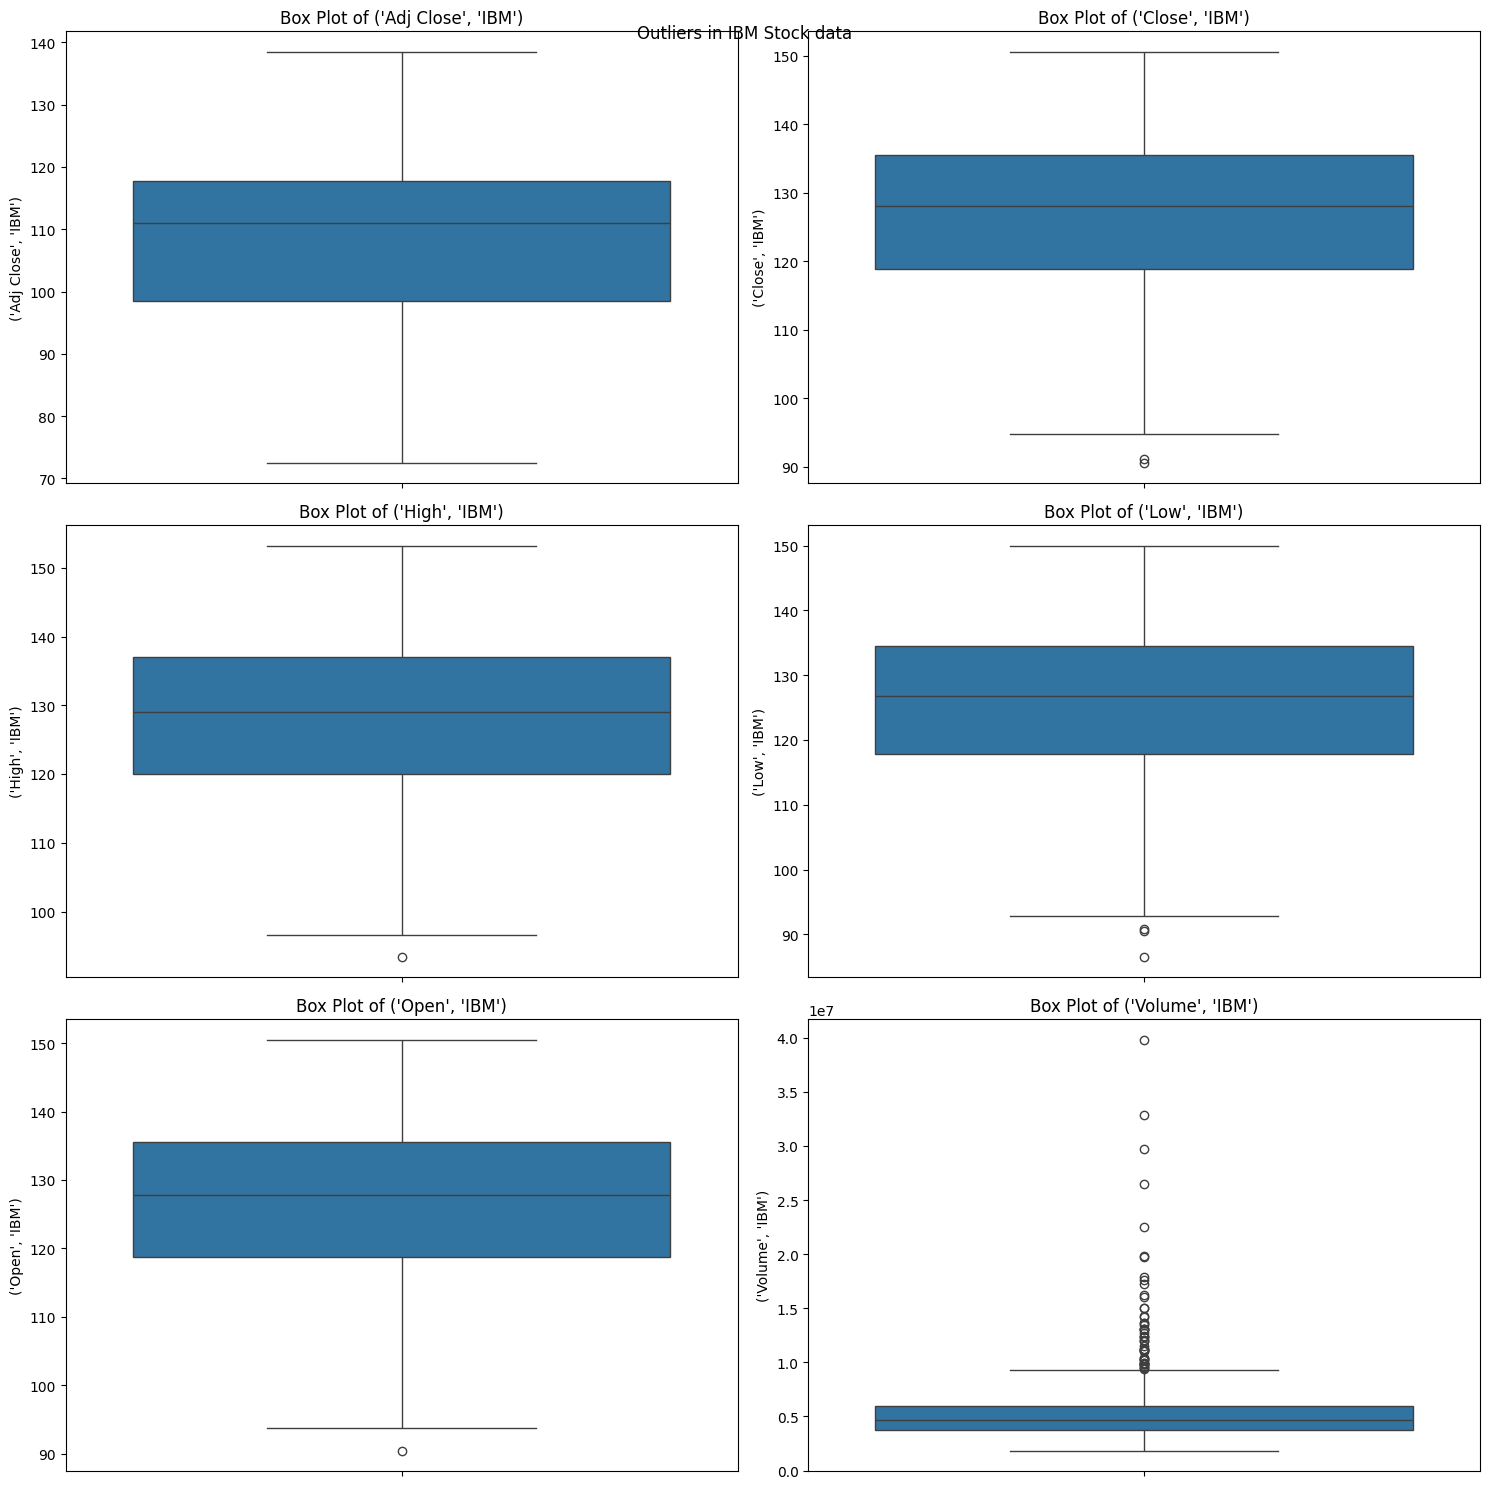


 Handling Outliers

Outlier Count Comparison (Before -> After):
('Adj Close', 'IBM'): 0 -> 0
('Close', 'IBM'): 2 -> 0
('High', 'IBM'): 1 -> 0
('Low', 'IBM'): 3 -> 0
('Open', 'IBM'): 1 -> 0
('Volume', 'IBM'): 52 -> 0


In [13]:
print("Analyzin Outliers for the IBM Stock Data")
outliers=detect_outliers(IBM_data,method='iqr',threshold=1.5)
for column,stats in outliers.items():
    print(f"\n{column}")
    print(f" Number of Outliers : {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f" Lower Bound : {stats['lower_bound']:.2f}")
        print(f" Upper Bound : {stats['upper_bound']:.2f}")
print("\n Plotting Outliers")
plot_outliers(IBM_data)
plt.suptitle("Outliers in IBM Stock data")
plt.show()
print("\n Handling Outliers")
IBM_data=handle_outliers(IBM_data,method='clip')
outliers_after=detect_outliers(IBM_data,method='iqr',threshold=1.5)
print("\nOutlier Count Comparison (Before -> After):")
for column in outliers.keys():
        before_count = outliers[column]['outlier_count']
        after_count = outliers_after[column]['outlier_count']
        print(f"{column}: {before_count} -> {after_count}")



 Outlier Analysis of Amazon Stock Data
('Adj Close', 'AMZN')
No of Outliers : 0
Lower Bound 48.89
Upper Bound 234.08
('Close', 'AMZN')
No of Outliers : 0
Lower Bound 48.89
Upper Bound 234.08
('High', 'AMZN')
No of Outliers : 0
Lower Bound 49.73
Upper Bound 236.25
('Low', 'AMZN')
No of Outliers : 0
Lower Bound 45.75
Upper Bound 233.28
('Open', 'AMZN')
No of Outliers : 0
Lower Bound 48.86
Upper Bound 234.31
('Volume', 'AMZN')
No of Outliers : 35
Lower Bound 170750.00
Upper Bound 151944750.00
Plot Outliers


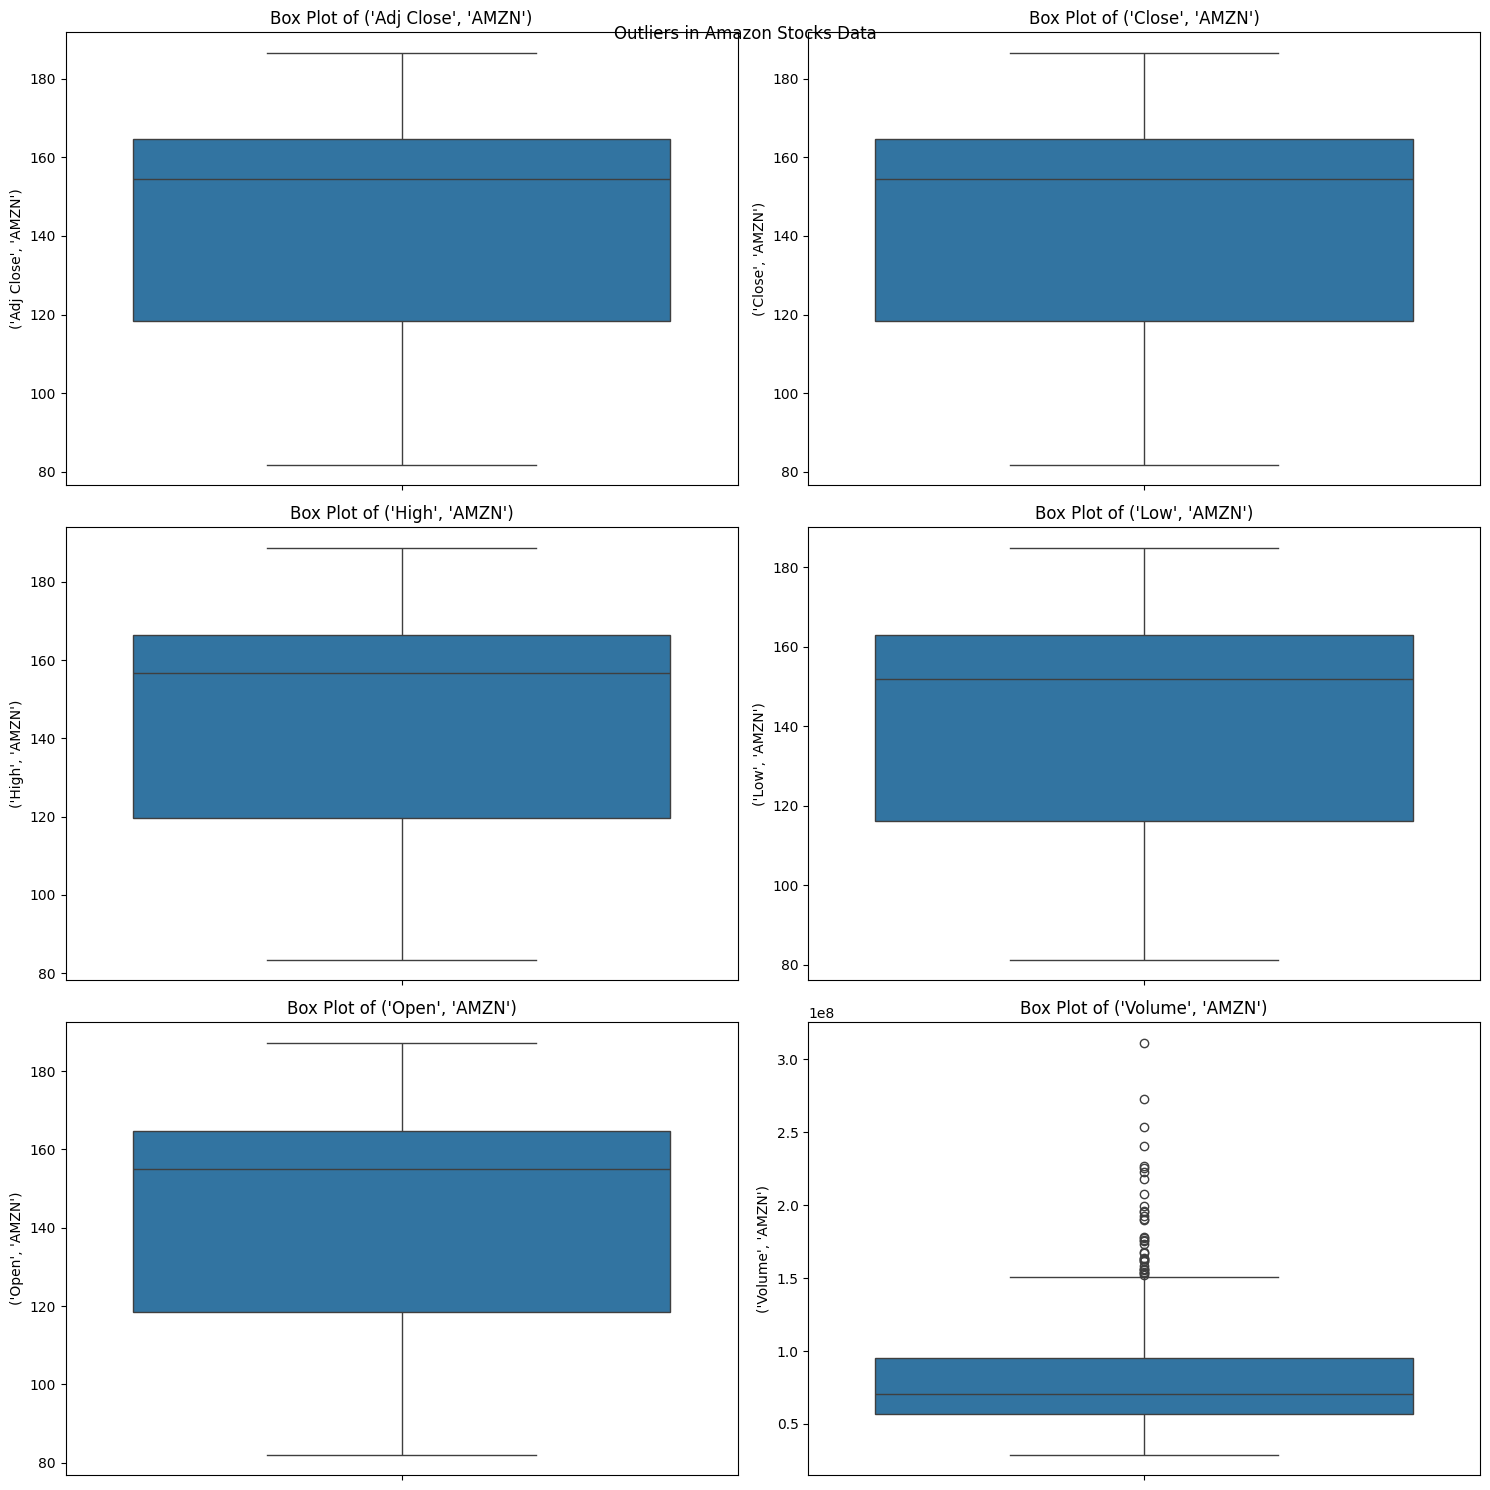


 handling Outliers...
Comparing Outliers (Before -> After)
('Adj Close', 'AMZN') 0->0
('Close', 'AMZN') 0->0
('High', 'AMZN') 0->0
('Low', 'AMZN') 0->0
('Open', 'AMZN') 0->0
('Volume', 'AMZN') 35->0


In [14]:
print("\n Outlier Analysis of Amazon Stock Data")
outliers=detect_outliers(amzn_data,method='iqr',threshold=1.5)
for column,stats in outliers.items():
    print(f"{column}")
    print(f"No of Outliers : {stats['outlier_count']}")
    if 'lower_bound' in stats:
        print(f"Lower Bound {stats['lower_bound']:.2f}")
        print(f"Upper Bound {stats['upper_bound']:.2f}")
print("Plot Outliers")
plot_outliers(amzn_data)
plt.suptitle('Outliers in Amazon Stocks Data')
plt.show()
print("\n handling Outliers...")
amzn_data=handle_outliers(amzn_data,method='clip')
outliers_after=detect_outliers(amzn_data,method='iqr',threshold=1.5)
print("Comparing Outliers (Before -> After)")
for column in outliers.keys():
    before_count=outliers[column]['outlier_count']
    after_count=outliers_after[column]['outlier_count']
    print(f"{column} {before_count}->{after_count}")


***LSTM - [Long Short Term  ]***

In [15]:
from data_preprocessing import predict_stock_prices_lstm


***For Google Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.3461 - val_loss: 0.0123
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0293 - val_loss: 0.0098
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0136 - val_loss: 0.0073
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0145 - val_loss: 0.0056
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0088 - val_loss: 0.0059
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0087 - val_loss: 0.0043
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0075 - val_loss: 0.0046
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0074 - val_loss: 0.0043
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0077 - val_loss: 0.0042
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

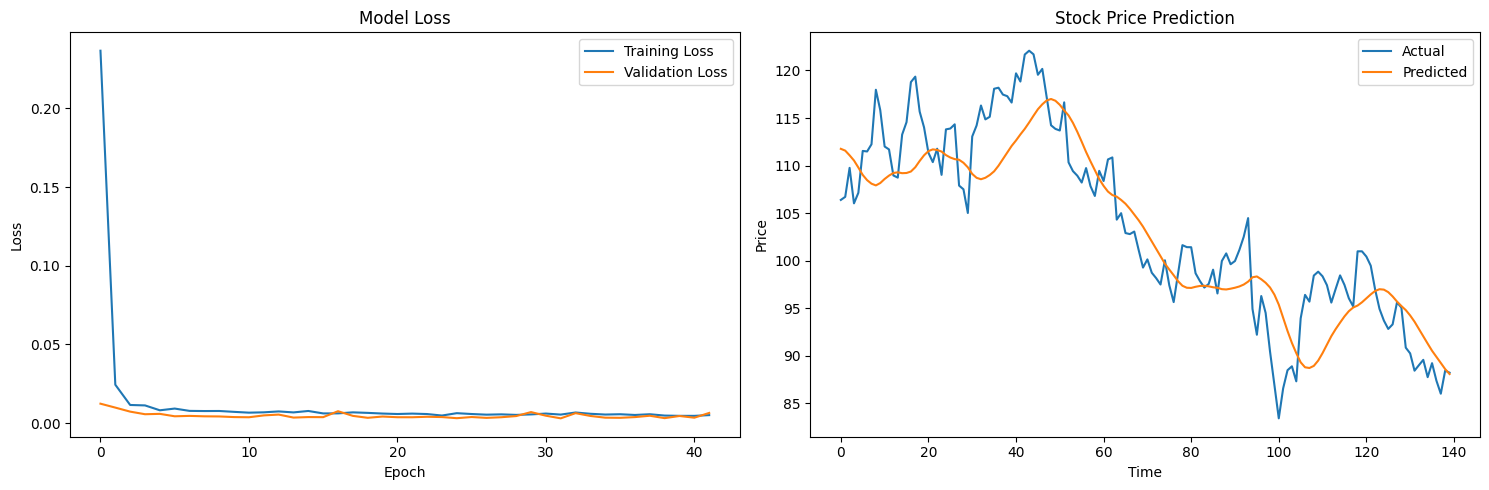


Model Performance Metrics:
MSE: 20.7853
RMSE: 4.5591
MAE: 3.8235
R2: 0.7833


In [16]:
results_googl_lstm = predict_stock_prices_lstm(
    googl_data,                    # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
)

***For Apple Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2883 - val_loss: 0.0299
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0158 - val_loss: 0.0144
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0127 - val_loss: 0.0106
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0123 - val_loss: 0.0077
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0107 - val_loss: 0.0062
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0093 - val_loss: 0.0070
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0084 - val_loss: 0.0060
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0079 - val_loss: 0.0069
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0073 - val_loss: 0.0060
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0071 - val_loss: 0.0059
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0081 - val_loss: 0.0059
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0

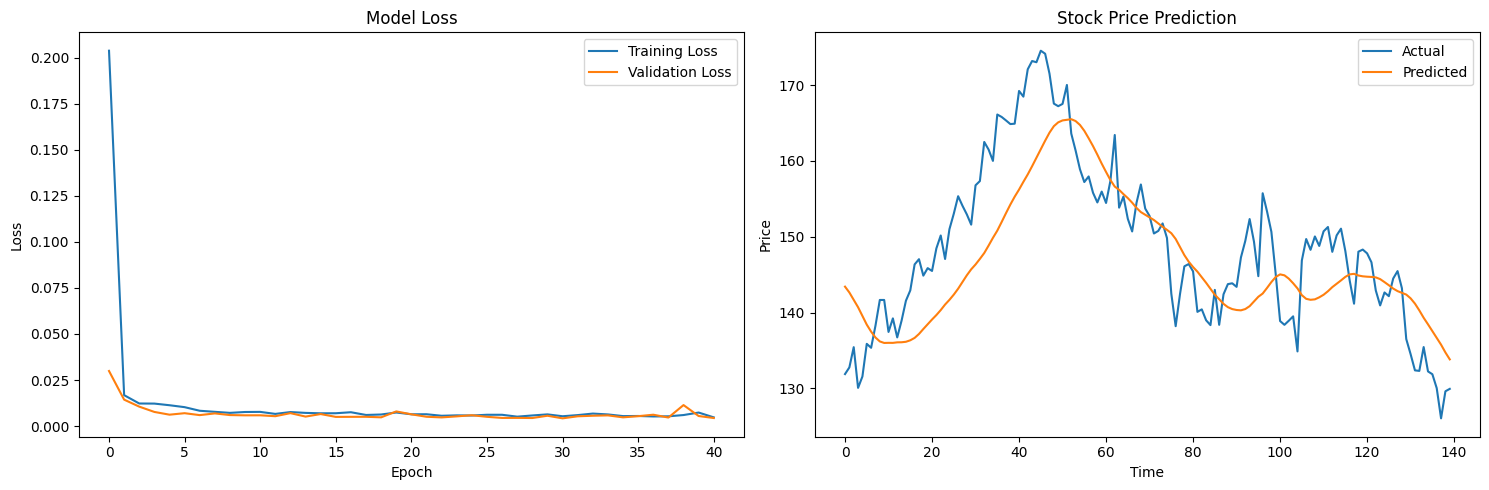


Model Performance Metrics:
MSE: 50.4365
RMSE: 7.1019
MAE: 5.9783
R2: 0.5829


In [17]:
result_aapl_lstm=predict_stock_prices_lstm(
    aapl_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For IBM Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.2665 - val_loss: 0.0052
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0294 - val_loss: 0.0295
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0159 - val_loss: 0.0160
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0127 - val_loss: 0.0086
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0122 - val_loss: 0.0079
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0114 - val_loss: 0.0059
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0114 - val_loss: 0.0078
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0103 - val_loss: 0.0072
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0086 - val_loss: 0.0091
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0100 - val_loss: 0.0103
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0110 - val_loss: 0.0118
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/stepWARNING:tensorflow:5 out o

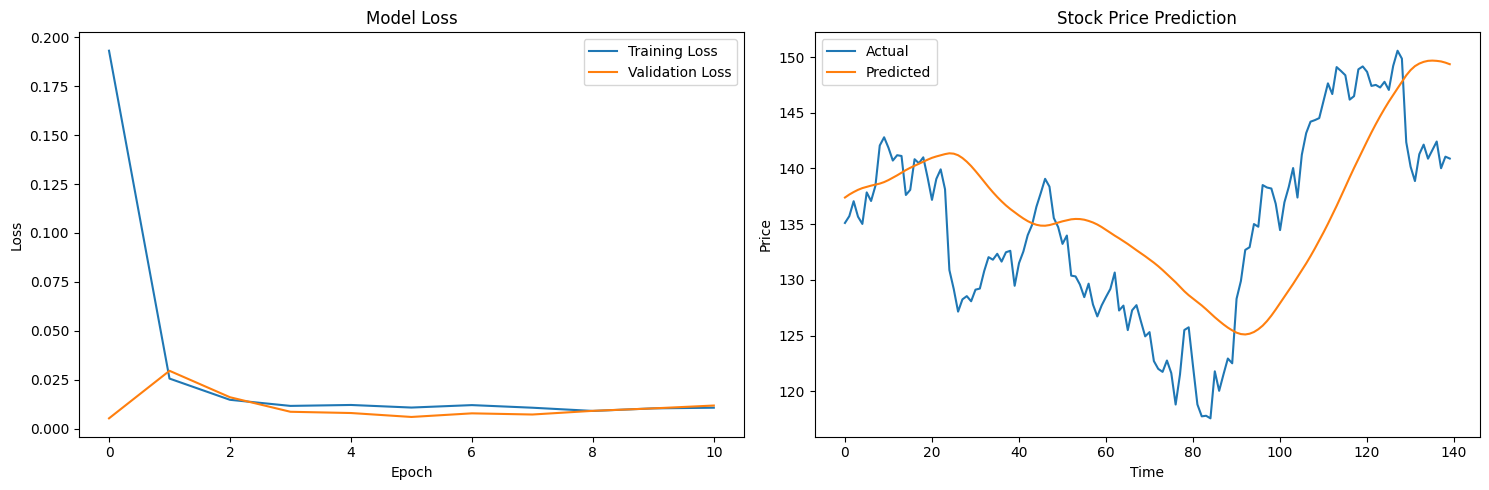


Model Performance Metrics:
MSE: 51.0066
RMSE: 7.1419
MAE: 6.1675
R2: 0.2724


In [18]:
result_ibm_lstm=predict_stock_prices_lstm(
    IBM_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For Amazon Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.4362 - val_loss: 0.0259
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0313 - val_loss: 0.0214
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0176 - val_loss: 0.0218
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0168 - val_loss: 0.0227
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0137 - val_loss: 0.0246
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0119 - val_loss: 0.0223
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - val_loss: 0.0209
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0146 - val_loss: 0.0181
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0153 - val_loss: 0.0216
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0119 - val_loss: 0.0218
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0124 - val_loss: 0.0230
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0

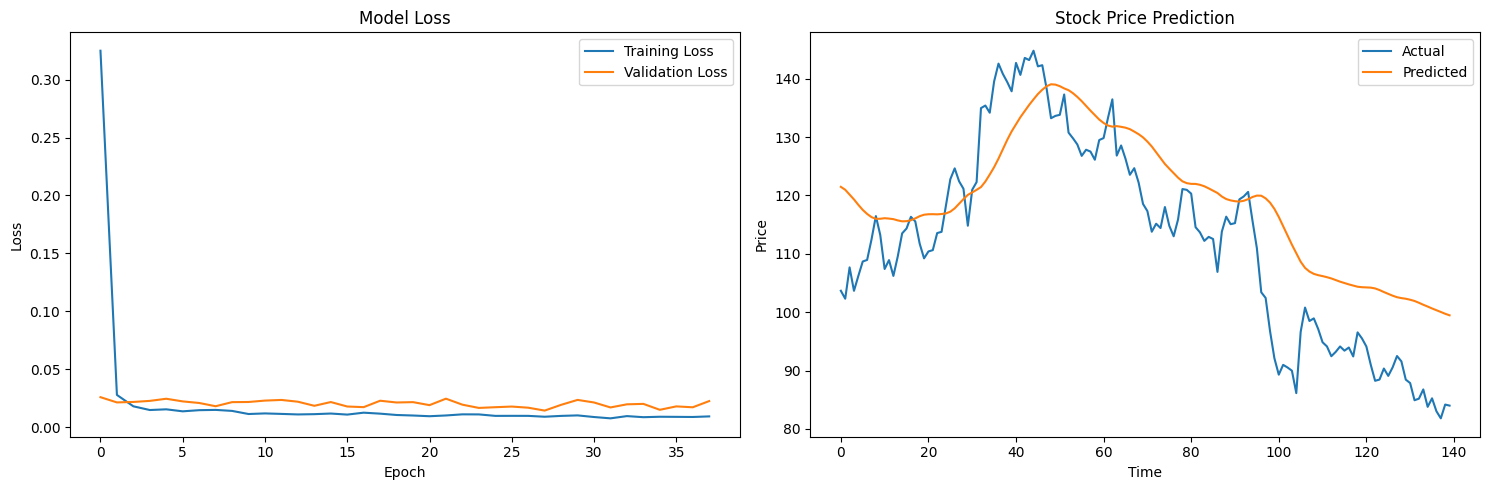


Model Performance Metrics:
MSE: 119.5049
RMSE: 10.9318
MAE: 9.2686
R2: 0.5918


In [19]:
result_amzn_lstm=predict_stock_prices_lstm(
    amzn_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate    
)

***GRU -[Gated Recurrent Unit]***

***For Google Data***

In [20]:
from data_preprocessing import predict_stock_prices_gru

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.3395 - val_loss: 0.1149
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0571 - val_loss: 0.0101
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0276 - val_loss: 0.0091
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0148 - val_loss: 0.0021
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0107 - val_loss: 0.0026
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0067 - val_loss: 0.0024
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0090 - val_loss: 0.0021
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0080 - val_loss: 0.0030
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0099 - val_loss: 0.0021
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0076 - val_loss: 0.0021
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0077 - val_loss: 0.0021
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0

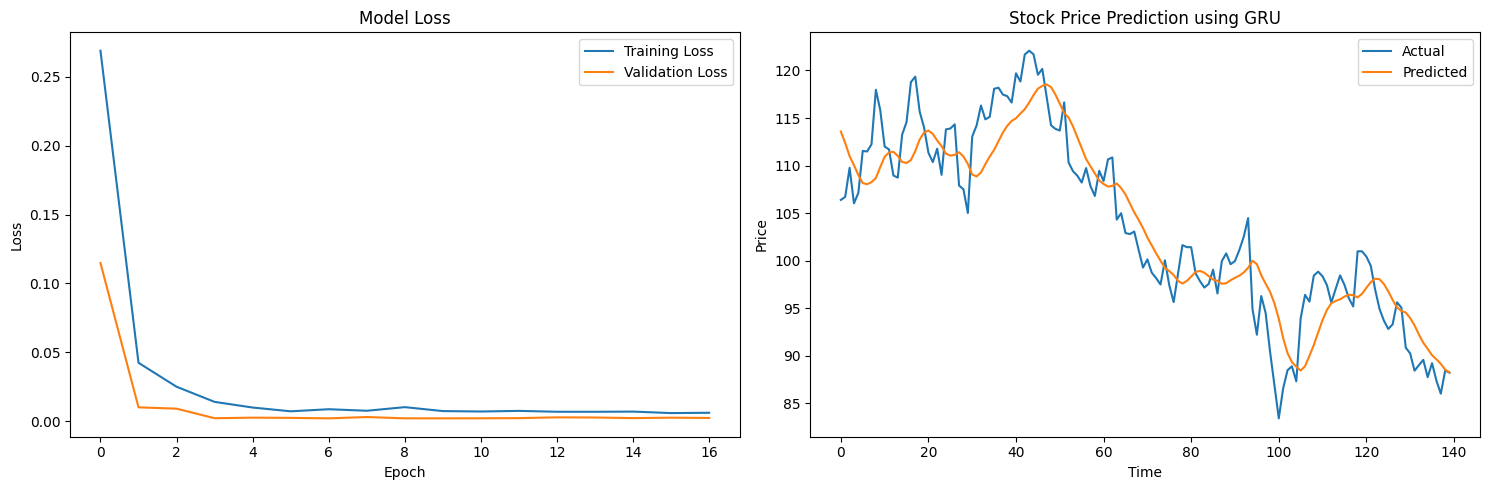


Model Performance Metrics:
MSE: 14.7969
RMSE: 3.8467
MAE: 3.2547
R2: 0.8457


In [21]:
results_googl_gru = predict_stock_prices_gru(
    googl_data,                    # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
)

***For Apple Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2893 - val_loss: 0.1342
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0416 - val_loss: 0.0040
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0235 - val_loss: 0.0173
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0132 - val_loss: 0.0029
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0090 - val_loss: 0.0029
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0081 - val_loss: 0.0024
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0080 - val_loss: 0.0025
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0087 - val_loss: 0.0026
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0074 - val_loss: 0.0026
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0073 - val_loss: 0.0025
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0

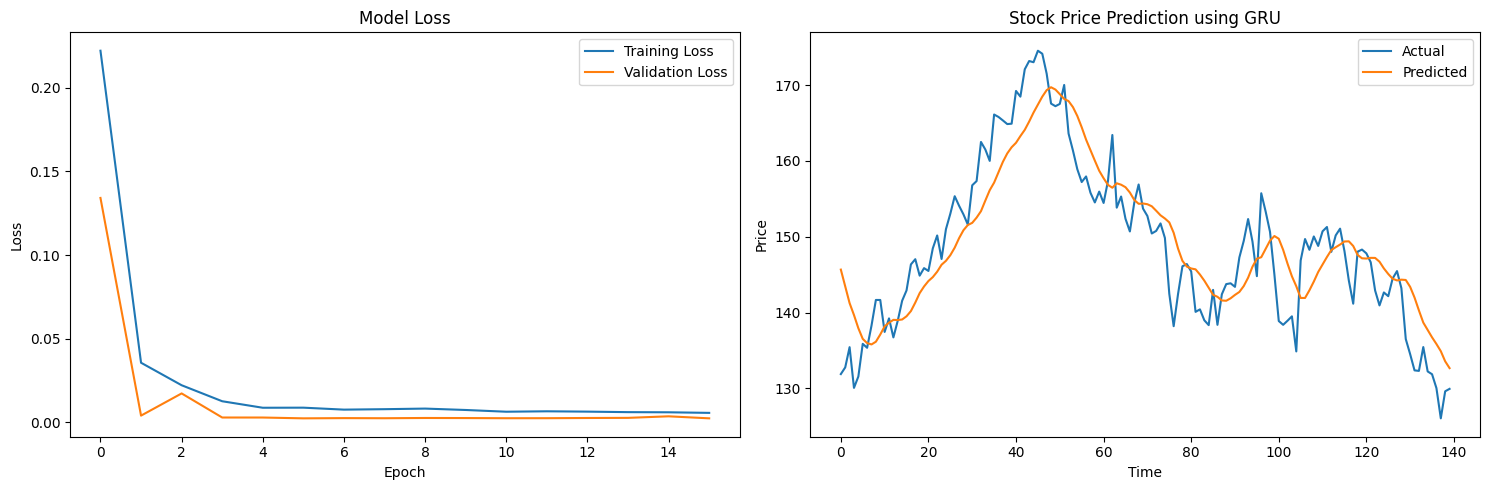


Model Performance Metrics:
MSE: 27.2265
RMSE: 5.2179
MAE: 4.3422
R2: 0.7749


In [22]:
result_aapl_gru=predict_stock_prices_gru(
    aapl_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For IBM Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.2800 - val_loss: 0.1806
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0603 - val_loss: 0.0045
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0222 - val_loss: 0.0215
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0169 - val_loss: 0.0087
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0141 - val_loss: 0.0111
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0140 - val_loss: 0.0076
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0120 - val_loss: 0.0094
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0093 - val_loss: 0.0073
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0097 - val_loss: 0.0049
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0081 - val_loss: 0.0049
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0

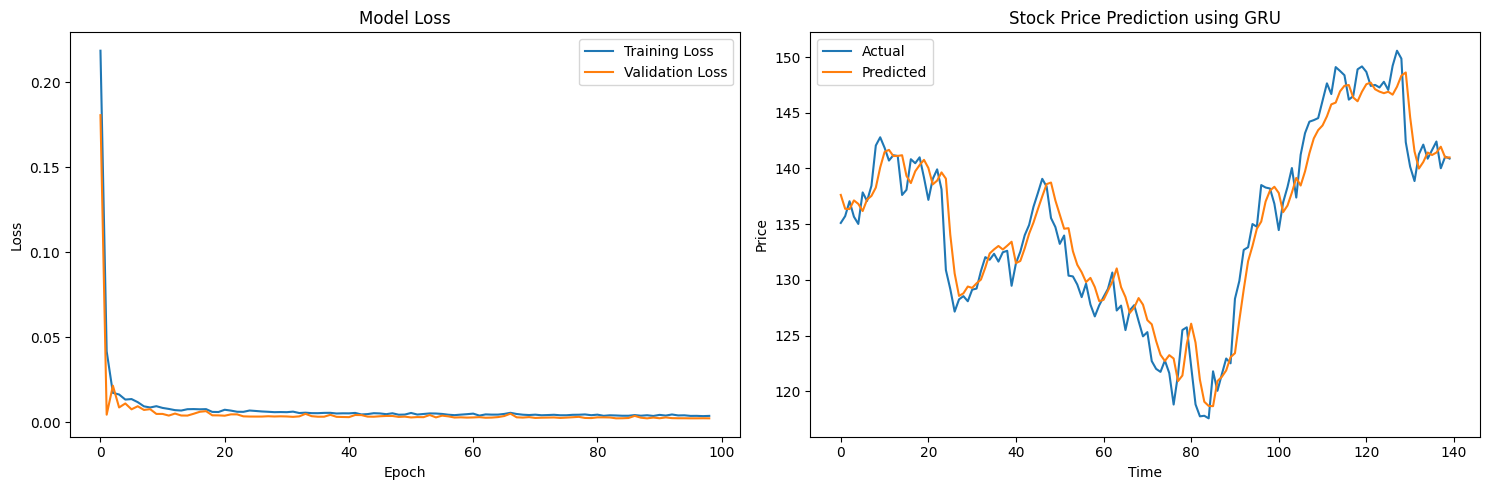


Model Performance Metrics:
MSE: 5.0633
RMSE: 2.2502
MAE: 1.7344
R2: 0.9278


In [23]:
result_ibm_gru=predict_stock_prices_gru(
    IBM_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate
    
)

***For Amazon Data***

Processing data...
Epoch 1/100


c:\Users\deepa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.5174 - val_loss: 0.0875
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.1183 - val_loss: 0.0769
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0314 - val_loss: 0.0200
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0171 - val_loss: 0.0247
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0133 - val_loss: 0.0138
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0123 - val_loss: 0.0097
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0106 - val_loss: 0.0071
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0134 - val_loss: 0.0059
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0089 - val_loss: 0.0058
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0110 - val_loss: 0.0051
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0106 - val_loss: 0.0051
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0

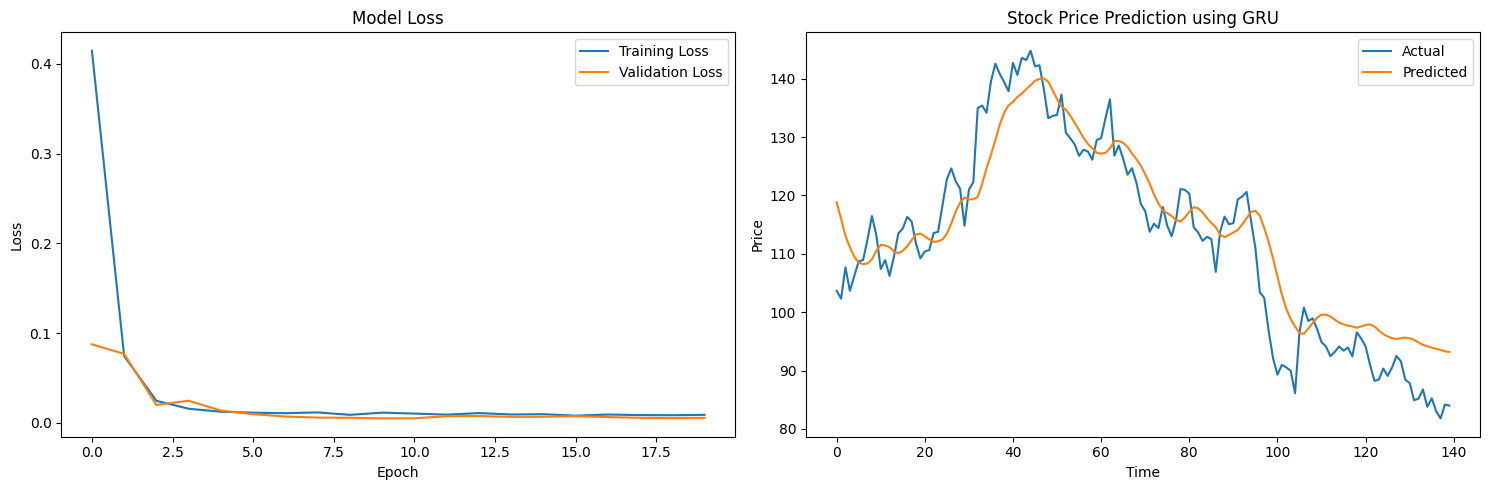


Model Performance Metrics:
MSE: 43.7009
RMSE: 6.6107
MAE: 5.4276
R2: 0.8507


In [24]:
result_amzn_gru=predict_stock_prices_gru(
    amzn_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    units=50,                  # Number of LSTM units
    dropout=0.2                # Dropout rate    
)

***Temporal Fusion Transformer***

***For Google Data***

In [31]:
from data_preprocessing import predict_stock_prices_tft

In [32]:
result_aapl_tft=predict_stock_prices_tft(
    aapl_data, # Single DataFrame
    target_col='Close',         # Predict closing prices
    sequence_length=60,         # Use 60 days of history
    train_split=0.8,           # 80% training, 20% testing
    dropout=0.2                # Dropout rate
    
)

Processing data...


AttributeError: module 'sklearn.preprocessing' has no attribute 'Normalization'

***For Apple Data***

***For IBM Data***

***For Amazon Data***